# CS405 Machine Learning: HW 1 Preliminary
### Name: 车凯威
### ID: 12032207

# 0 Prepare the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

(a) Plot the graph with given code, the result should be same as this.
![](originalData.png)
`x_train` and `y_train` are the datas you need to create, `sample_size` is 10 and `std` is 0.25. 

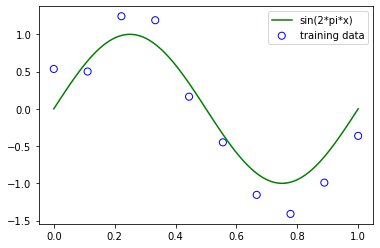

In [3]:
# my code

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test,c = 'g',label="sin(2*pi*x)")
plt.legend()
plt.show()  

(b) On the basis of the results, you should try $0^{th}$ order polynomial, $1^{st}$ order polynomial, $3^{rd}$ order polynomial and some other order polynomial, show the results include fitting and over-fitting.

# 1 Transforms Polynomial Feature

In [4]:
import itertools
import functools
class PolynomialFeature(object):
    """
    polynomial features

    transforms input array with polynomial features

    Example
    =======
    x =
    [[a, b],
    [c, d]]

    y = PolynomialFeatures(degree=2).transform(x)
    y =
    [[1, a, b, a^2, a * b, b^2],
    [1, c, d, c^2, c * d, d^2]]
    """

    def __init__(self, degree=2):
        """
        construct polynomial features

        Parameters
        ----------
        degree : int
            degree of polynomial
        """
        assert isinstance(degree, int)
        self.degree = degree

    def transform(self, x):
        """
        transforms input array with polynomial features

        Parameters
        ----------
        x : (sample_size, n) ndarray
            input array

        Returns
        -------
        output : (sample_size, 1 + nC1 + ... + nCd) ndarray
            polynomial features
        """
        if x.ndim == 1:
            x = x[:, None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for degree in range(1, self.degree + 1):
            for items in itertools.combinations_with_replacement(x_t, degree):
                features.append(functools.reduce(lambda x, y: x * y, items))
        return np.asarray(features).transpose()
    
class Regression(object):
    """
    Base class for regressors
    """
    pass
    


In [5]:
# my code

# train data in linear model
def train_linear(x_train,y_train,x_test, degree):
    # feature transform
    ployfeature = PolynomialFeature(degree)
    feature_train = ployfeature.transform(x_train)
    feature_test = ployfeature.transform(x_test)

    # LinearRegression and fit
    linModel = LinearRegression()
    linModel.fit(feature_train,y_train)
    y_pred_test = linModel.predict(feature_test)
    y_pred_train = linModel.predict(feature_train)


    return y_pred_train,y_pred_test

# 2 Regression

## 2.1 Linear Regression

In [6]:
class LinearRegression(Regression):
    """
    Linear regression model
    y = X @ w
    t ~ N(t|X @ w, var)
    """

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        perform least squares fitting

        Parameters
        ----------
        X : (N, D) np.ndarray
            training independent variable
        t : (N,) np.ndarray
            training dependent variable
        """
        self.w = np.linalg.pinv(X) @ t
        self.var = np.mean(np.square(X @ self.w - t))

    def predict(self, X:np.ndarray, return_std:bool=False):
        """
        make prediction given input

        Parameters
        ----------
        X : (N, D) np.ndarray
            samples to predict their output
        return_std : bool, optional
            returns standard deviation of each predition if True

        Returns
        -------
        y : (N,) np.ndarray
            prediction of each sample
        y_std : (N,) np.ndarray
            standard deviation of each predition
        """
        y = X @ self.w
        if return_std:
            y_std = np.sqrt(self.var) + np.zeros_like(y)
            return y, y_std
        return y

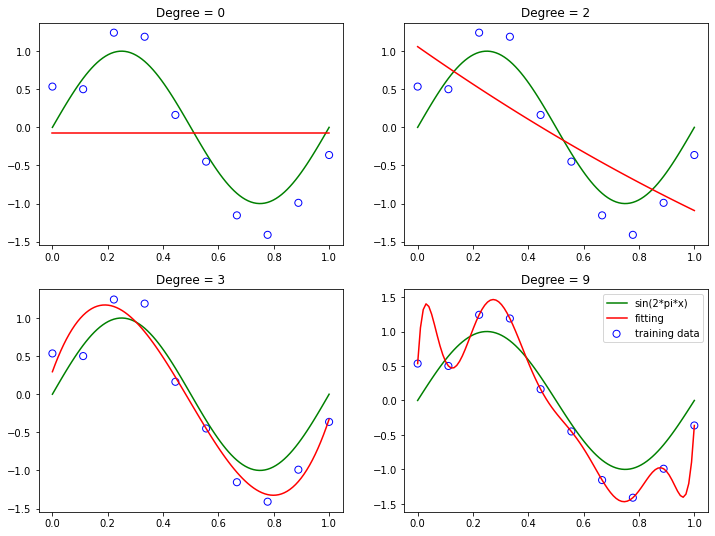

In [7]:
# train and plot
degree = [0,2,3,9]
idx = 0
plt.figure(figsize=(12,9))
for i in degree:
    y_pred_train,y_pred_test = train_linear(x_train,y_train,x_test, i)
    idx += 1
    plt.subplot(2, 2, idx)
    title = "Degree = " + str(i)
    plt.title(title)
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test,c = 'g',label="sin(2*pi*x)")
    plt.plot(x_test, y_pred_test,color='r',label='fitting')
plt.legend()
plt.show()  

### Analysis
We notice that the constant (M = 0) and first order (M = 1) polynomials give rather poor fits to the data and consequently rather poor representations of the function sin(2πx). The third order (M = 3) polynomial seems to give the best fit to the function sin(2πx) of the examples shown in Figure 1.4. When we go to a much higher order polynomial (M = 9), we obtain an excellent fit to the training data. In fact, the polynomial passes exactly through each data point and E(w*)=0.
However, the fitted curve oscillates wildly and gives a very poor representation of the function sin(2πx). This latter behaviour is known as over-fitting.

## 2.2 root-mean-square error

(c) Plot the graph of the root-mean-square error.

In [8]:
# Complete this function
from math import sqrt
from sklearn.metrics import mean_squared_error
def rmse(a, b):
    MSE=mean_squared_error(a,b)
    RMSE=sqrt(MSE)
    return RMSE

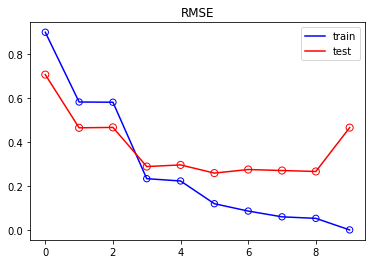

In [9]:
# RMSE
RMSE_train = []
RMSE_test = []
degree = range(0,10)
for i in degree:
    y_pred_train,y_pred_test = train_linear(x_train,y_train,x_test, i)
    RMSE_train.append(rmse(y_pred_train,y_train))
    RMSE_test.append(rmse(y_pred_test,y_test))

plt.title("RMSE")
plt.plot(degree,RMSE_train,color='b',label='train')
plt.plot(degree,RMSE_test,color='r',label='test')
plt.legend()

plt.scatter(degree, RMSE_train, s=40, edgecolors="b", c='', marker='o')
plt.scatter(degree, RMSE_test, s=50, edgecolors="r", c='', marker='o')
plt.show()

### Analysis
RMS function in which the division by N allows us to compare different sizes of data sets on
an equal footing, and the square root ensures that ERMS is measured on the same
scale (and in the same units) as the target variable t. Graphs of the training and
test set RMS errors are shown, for various values of M, in Figure 1.5. The test
set error is a measure of how well we are doing in predicting the values of t for
new data observations of x. We note from Figure 1.5 that small values of M give
relatively large values of the test set error, and this can be attributed to the fact that
the corresponding polynomials are rather inflexible and are incapable of capturing
the oscillations in the function sin(2πx).

## 2.3 Bayesian Regression

(d) Plot the graph of the predictive distribution resulting from a Bayesian treatment of polynomial curve fitting using an M=9 polynomial, with the fixed parameters $\alpha=5\times 10^{-3}$ and $\beta=11.1$(corresponding to the known noise variance).

In [10]:
class BayesianRegression(Regression):
    """
    Bayesian regression model

    w ~ N(w|0, alpha^(-1)I)
    y = X @ w
    t ~ N(t|X @ w, beta^(-1))
    """

    def __init__(self, alpha:float=1., beta:float=1.):
        self.alpha = alpha
        self.beta = beta
        self.w_mean = None
        self.w_precision = None

    def _is_prior_defined(self) -> bool:
        return self.w_mean is not None and self.w_precision is not None

    def _get_prior(self, ndim:int) -> tuple:
        if self._is_prior_defined():
            return self.w_mean, self.w_precision
        else:
            return np.zeros(ndim), self.alpha * np.eye(ndim)

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        bayesian update of parameters given training dataset

        Parameters
        ----------
        X : (N, n_features) np.ndarray
            training data independent variable
        t : (N,) np.ndarray
            training data dependent variable
        """

        mean_prev, precision_prev = self._get_prior(np.size(X, 1))

        w_precision = precision_prev + self.beta * X.T @ X
        w_mean = np.linalg.solve(
            w_precision,
            precision_prev @ mean_prev + self.beta * X.T @ t
        )
        self.w_mean = w_mean
        self.w_precision = w_precision
        self.w_cov = np.linalg.inv(self.w_precision)

    def predict(self, X:np.ndarray, return_std:bool=False, sample_size:int=None):
        """
        return mean (and standard deviation) of predictive distribution

        Parameters
        ----------
        X : (N, n_features) np.ndarray
            independent variable
        return_std : bool, optional
            flag to return standard deviation (the default is False)
        sample_size : int, optional
            number of samples to draw from the predictive distribution
            (the default is None, no sampling from the distribution)

        Returns
        -------
        y : (N,) np.ndarray
            mean of the predictive distribution
        y_std : (N,) np.ndarray
            standard deviation of the predictive distribution
        y_sample : (N, sample_size) np.ndarray
            samples from the predictive distribution
        """

        if sample_size is not None:
            w_sample = np.random.multivariate_normal(
                self.w_mean, self.w_cov, size=sample_size
            )
            y_sample = X @ w_sample.T
            return y_sample
        y = X @ self.w_mean
        if return_std:
            y_var = 1 / self.beta + np.sum(X @ self.w_cov * X, axis=1)
            y_std = np.sqrt(y_var)
            return y, y_std
        return y

In [11]:
# Write you codes here.
## train data in linear model
def train_bayesian(x_train,y_train,x_test, degree):
    # feature transform
    ployfeature=PolynomialFeature(degree)
    feature_train=ployfeature.transform(x_train)
    feature_test=ployfeature.transform(x_test)

    # BayesianRegression and fit
    BayesianModel = BayesianRegression(alpha=5e-3, beta=11.1)
    BayesianModel.fit(feature_train, y_train)
    y_pred_test= BayesianModel.predict(feature_test)
    y_pred_train = BayesianModel.predict(feature_train)

    # var_train = linModel.var
    # var_test = np.mean(np.square(y_pred - y_test))

    return y_pred_train,y_pred_test

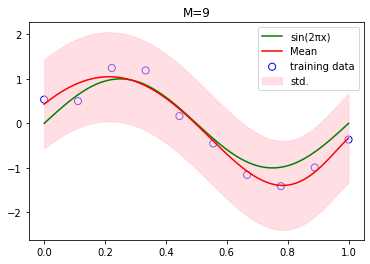

In [12]:
y_pred_train,y_pred_test = train_bayesian(x_train,y_train,x_test, 9)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="sin(2πx)")
plt.plot(x_test, y_pred_test, c="r", label="Mean")
plt.fill_between(x_test, y_pred_test-1, y_pred_test+1, color="pink", label="std.", alpha=0.5)
plt.title("M=9")
plt.legend(loc='best')
plt.show()

### Analysis
By adopting a Bayesian approach, the
over-fitting problem can be avoided. We shall see that there is no difficulty from
a Bayesian perspective in employing models for which the number of parameters
greatly exceeds the number of data points. Indeed, in a Bayesian model the effective
number of parameters adapts automatically to the size of the data set.

## 2.4 Change the  𝑠𝑎𝑚𝑝𝑙𝑒_𝑠𝑖𝑧𝑒

(e) Change the $sample\_size$ to 2, 3 or 10 times than before, explain the change of $M$.

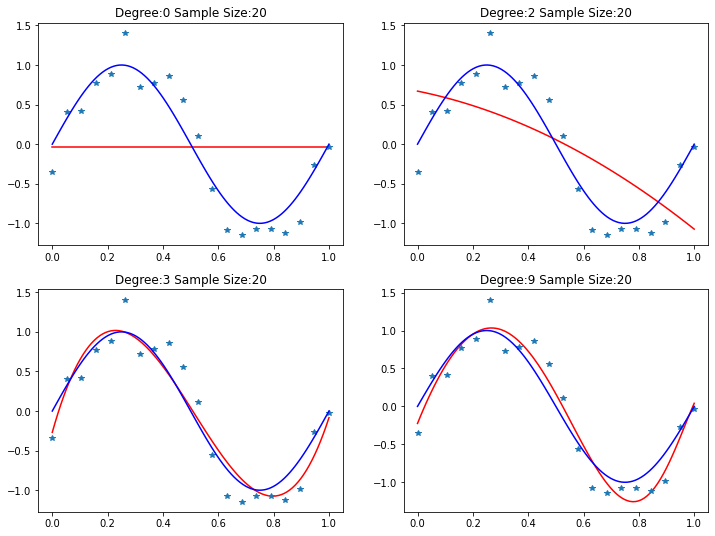

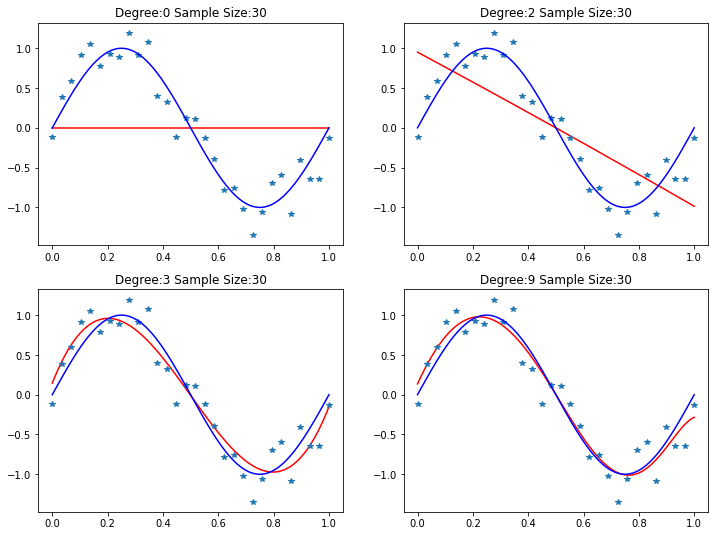

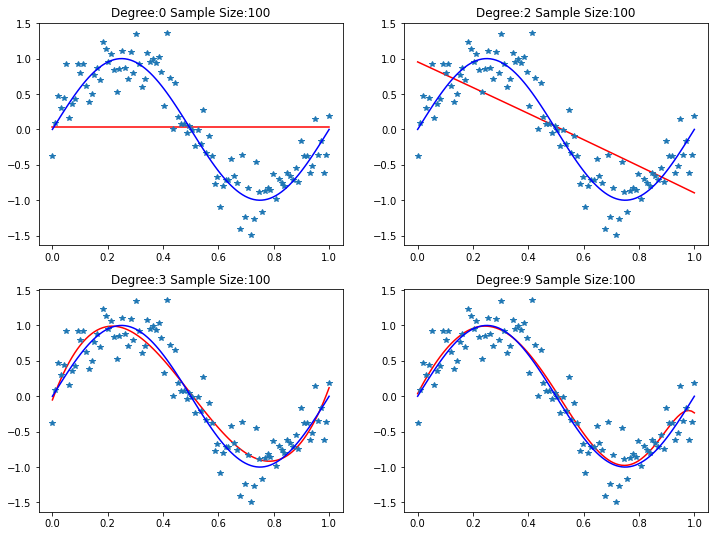

In [13]:
# Write your codes here.
for j in [2,3,10]:
    x_train, y_train = create_toy_data(func, 10*j, 0.25)
    x_test = np.linspace(0, 1, 100)
    y_test = func(x_test)
    idx = 0
    plt.figure(figsize=(12,9))
    for i in [0,2,3,9]:
        idx += 1
        y_pred_train,y_pred_test = train_bayesian(x_train,y_train,x_test, i)
        plt.subplot(2, 2, idx)
        title = "Degree:"+str(i)+" Sample Size:"+ str(10*j)
        plt.title(title)
        plt.plot(x_test, y_pred_test, c="r")
        plt.plot(x_train, y_train,'*')
        plt.plot(x_test, y_test,c='b')
    plt.show()



### Analysis
One of the most frequent problems in statistical analysis is the determination of the appropriate sample size. One may ask why sample size is so important. The answer to this is that an appropriate sample size is required for validity. If the sample size it too small, it will not yield valid results. An appropriate sample size can produce accuracy of results. Moreover, the results from the small sample size will be questionable. 

A sample size that is too large will result in wasting money and time. It is also unethical to choose too large a sample size. There is no certain rule of thumb to determine the sample size. Some researchers do, however, support a rule of thumb when using the sample size. 

For example, in regression analysis, many researchers say that there should be at least 10 observations per variable. If we are using three independent variables, then a clear rule would be to have a minimum sample size of 30. Some researchers follow a statistical formula to calculate the sample size.

# Reference
[1] Kelley, Ken & Maxwell, Scott. (2003). Sample Size for Multiple Regression: Obtaining Regression Coefficients That Are Accurate, Not Simply Significant. Psychological methods. 8. 305-21. 10.1037/1082-989X.8.3.305. 

[2] Maxwell, Scott. (2001). Sample size and multiple regression. Psychological methods. 5. 434-58. 10.1037//1082-989X.5.4.434. 